-----------------------------------
#### **Programacion Lineal con Python: Caso transporte**
**Universidad Tecnologica Nacional - Facultad Buenos Aires** <br>
**Ingenieria Industrial**<br>
**Investigacion Operativa** <br>
Autor: Martin Palazzo <br>
Curso I4051 <br>



In [1]:
#pip install pulp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pulp
from pulp import *
import scipy as sp
from scipy import optimize

La funcion objetivo del problema de transporte

$$\text{min z } = \begin{matrix}
464x_{11} + 513x_{12} + 654x_{13} + 867x_{14} \\
 + 352x_{21} + 416x_{22} + 690x_{23} + 791x_{24}\\
 + 995x_{31} + 682x_{32} + 388x_{33} + 685x_{34} 
\end{matrix}
$$

sujeto a las restricciones de oferta


$$
x_{11} + x_{12} + x_{13} + x_{14} = 75\\
x_{21} + x_{22} + x_{23} + x_{24} = 125\\
x_{31} + x_{32} + x_{33} + x_{34} = 100
$$

y de demanda

$$
x_{11} + x_{21} + x_{31}  = 80\\
x_{12} + x_{22} + x_{32}  = 65\\
x_{13} + x_{23} + x_{33}  = 70\\
x_{14} + x_{24} + x_{34}  = 85
$$

In [5]:
# definimos si es un problema de minimizacion o maximizacion
transport_ = LpProblem("Transporte", LpMinimize)

# definimos las variables de decision, el tipo de variable y la cota inferior
x1 = LpVariable('x1', lowBound=0, cat='Continuous')
x2 = LpVariable('x2', lowBound=0, cat='Continuous')
x3 = LpVariable('x3', lowBound=0, cat='Continuous')
x4 = LpVariable('x4', lowBound=0, cat='Continuous')
x5 = LpVariable('x5', lowBound=0, cat='Continuous')
x6 = LpVariable('x6', lowBound=0, cat='Continuous')
x7 = LpVariable('x7', lowBound=0, cat='Continuous')
x8 = LpVariable('x8', lowBound=0, cat='Continuous')
x9 = LpVariable('x9', lowBound=0, cat='Continuous')
x10 = LpVariable('x10', lowBound=0, cat='Continuous')
x11 = LpVariable('x11', lowBound=0, cat='Continuous')
x12 = LpVariable('x12', lowBound=0, cat='Continuous')


In [6]:
# primero agregamos la funcion objetivo
transport_ += 464*x1 + 513*x2 + 654*x3 + 867*x4 + 352*x5 + 416*x6 + 690*x7 + 791*x8 + 995*x9 + 682*x10 + 388*x11 + 685*x12, "Funcion objetivo"

# luego agregamos restricciones
transport_ += x1 + x2 + x3 + x4 == 75, "oferta 1"
transport_ += x5 + x6 + x7 + x8 == 125, "oferta 2"
transport_ += x9 + x10 + x11 + x12 == 100, "oferta 3"
transport_ += x1 + x5 + x9  == 80, "Demanda 1 "
transport_ += x2 + x6 + x10  == 65, "Demanda 2 "
transport_ += x3 + x7 + x11  == 70, "Demanda 3 "
transport_ += x4 + x8 + x12  == 85, "Demanda 4 "

In [7]:
# Resolver el problema con el solver de PULP
transport_.solve()

1

In [8]:
# valor de la funcion objetivo
value(transport_.objective)

152535.0

In [14]:
# obtenemos el valor de la variable de decision X1....X12 en el punto optimo
solucion = np.array([[transport_.variables()[0].varValue,
transport_.variables()[1].varValue,
transport_.variables()[2].varValue,
transport_.variables()[3].varValue],
[transport_.variables()[4].varValue,
transport_.variables()[5].varValue,
transport_.variables()[6].varValue,
transport_.variables()[7].varValue],
[transport_.variables()[8].varValue,
transport_.variables()[9].varValue,
transport_.variables()[10].varValue,
transport_.variables()[11].varValue]])

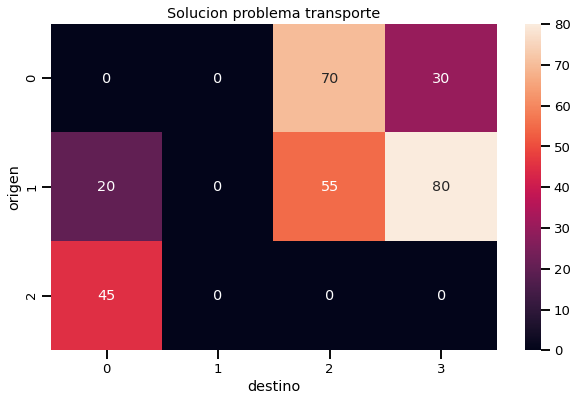

In [30]:
plt.figure(figsize=(10, 6))
sns.set_context('talk', font_scale = 0.8)
sns.heatmap(solucion,annot = True)
plt.ylabel('origen')
plt.xlabel('destino')
plt.title('Solucion problema transporte')
plt.show()